In [1]:
import random
import numpy as np
from numpy import ndarray
import functools
import timeit
import typing
import matplotlib.pyplot as plt

In [2]:
def create_vector(n: int) -> list:
    return [random.randint(0, 100) for _ in range(n)]


def TZ12(vec: list) -> int:
    return sum(vec)


def TZ13(vec: list) -> ndarray:
    return np.prod(vec)


def TZ14(vec: list, x: float = 14 * 1.5) -> float:
    result = 0
    for i in range(len(vec), 0, -1):
        result = result * x + vec[i - 1]
    return result


def TZ16(vec: list) -> int:
    result = vec[0]
    for coordinate in vec[1:]:
        if coordinate < result:
            result = coordinate
    return result

def create_matrix(n: int) -> list:
    result = [[random.randint(0, 1000) for j in range(n)] for i in range(n)]
    return result

def multiply_matrix(A, B):
    return np.dot(A, B)

In [3]:
# %load -y -n -s get_usage_time usage_time.py
def get_usage_time(*, number: int = 1, setup: str = 'pass', ndigits: int = 3) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator

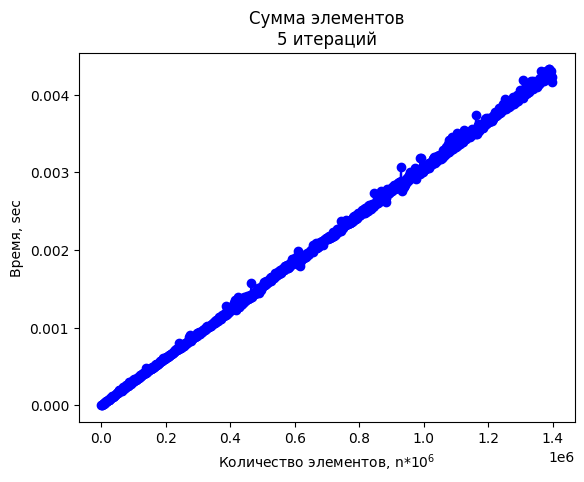

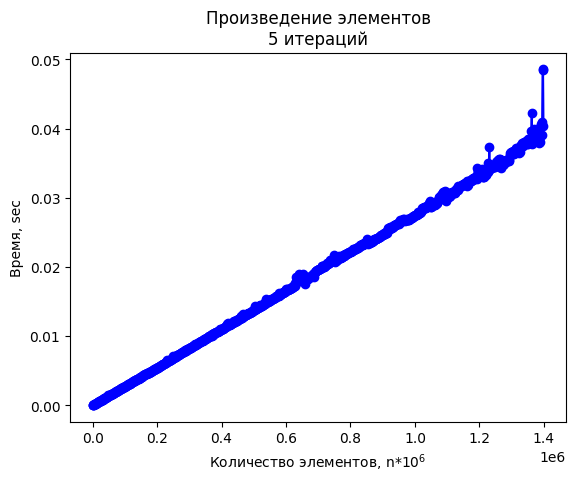

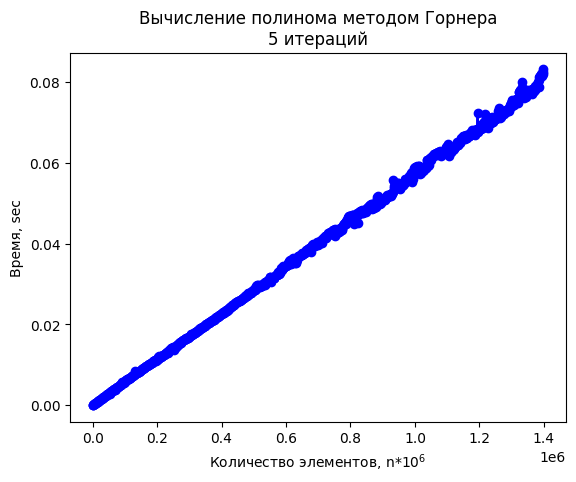

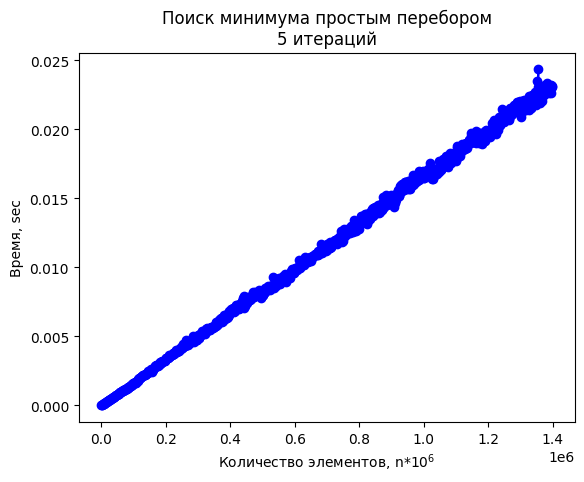

In [4]:
funcs = {
    'Сумма элементов': TZ12,
    'Произведение элементов': TZ13,
    'Вычисление полинома методом Горнера': TZ14,
    'Поиск минимума простым перебором': TZ16
}

N = 20 - 6
iter_count = 5
count = range(1, 10 ** 5 * N, 100 * N)
for title in funcs:
    vectors = [create_vector(10 ** 5 * N) for _ in range(iter_count)]
    times = [0.0] * (10 ** 3)
    func = get_usage_time(ndigits=5)(funcs[title])

    for i in count:
        position = i // (100 * N)
        for vector in vectors:
            times[position] += func(vector[:i])
        times[position] = times[position] / iter_count

    fig = plt.plot(count, times, 'bo-')
    plt.title(f'{title}\n{iter_count} итераций')
    ax = plt.gca()
    ax.set_xlabel('Количество элементов, n*$10^6$')
    ax.set_ylabel('Время, sec')
    plt.show()

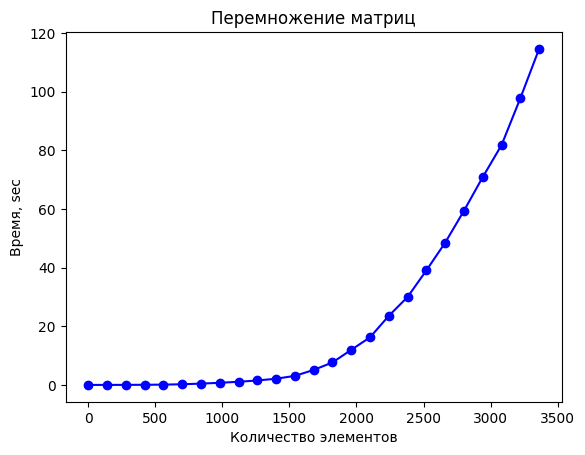

In [5]:
N = 20 - 6
count = range(1, 250 * N, 10 * N)
times = [0.0] * 25
func = get_usage_time(ndigits=5)(multiply_matrix)
for i in count:
    A = create_matrix(i)
    B = create_matrix(i)
    times[i // (10 * N)] = func(A, B)

fig = plt.plot(count, times, 'bo-')
plt.title('Перемножение матриц')
ax = plt.gca()
ax.set_xlabel('Количество элементов')
ax.set_ylabel('Время, sec')
plt.show()